# **DSA 210 Term Project**

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from collections import Counter

# **Sorted List of Favorited Videos between November 2021 - November 2024**

In [4]:
json_file_path = 'user_data_tiktok.json'

with open(json_file_path, 'r', encoding='utf-8') as file:
    raw_data = json.load(file)

activity_data = raw_data["Activity"]["Favorite Videos"]["FavoriteVideoList"]
data = pd.DataFrame(activity_data)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])
sorted_data = data.sort_values(by='Date')
sorted_links = sorted_data[['Date', 'Link']]
sorted_links.to_csv('sorted_tiktok_favorite.csv', index=False)

print("Chronologically sorted links saved as 'sorted_tiktok_favorite.csv'.")
print(sorted_links.head())


Chronologically sorted links saved as 'sorted_tiktok_favorite.csv'.
                    Date                                               Link
2450 2021-11-01 21:31:17  https://www.tiktokv.com/share/video/7018951689...
2449 2021-11-04 21:28:55  https://www.tiktokv.com/share/video/7025920454...
2448 2021-11-08 16:27:33  https://www.tiktokv.com/share/video/7027901495...
2447 2021-11-08 16:40:33  https://www.tiktokv.com/share/video/7022320140...
2446 2021-11-08 21:36:31  https://www.tiktokv.com/share/video/7007094792...


# **Daily Activity on TikTok**

This histogram shows the hourly total activity on tiktok based on my favorite videos list.

C:\Users\dell\AppData\Local\Temp\ipykernel_48536\2498908585.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x700 with 0 Axes>

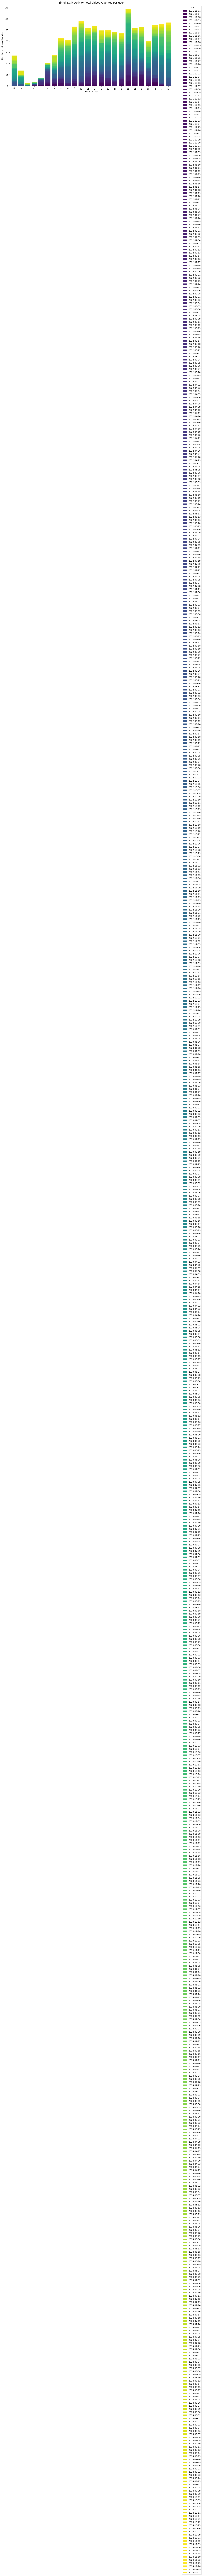

In [5]:
file_path = "sorted_tiktok_favorite.csv"
df = pd.read_csv(file_path)

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.date
df['Hour'] = df['Date'].dt.hour

daily_activity = df.groupby(['Day', 'Hour']).size().reset_index(name='VideoCount')
activity_matrix = daily_activity.pivot(index='Day', columns='Hour', values='VideoCount').fillna(0)

plt.figure(figsize=(14, 7))
activity_matrix.T.plot(kind='bar', stacked=True, figsize=(14, 7), width=0.8, colormap='viridis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos Favorited')
plt.title('TikTok Daily Activity: Total Videos Favorited Per Hour')
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# **Daily Activity on Tiktok Heatmap**

This heatmap also shows the hourly total of my tiktok activity including days of the week.

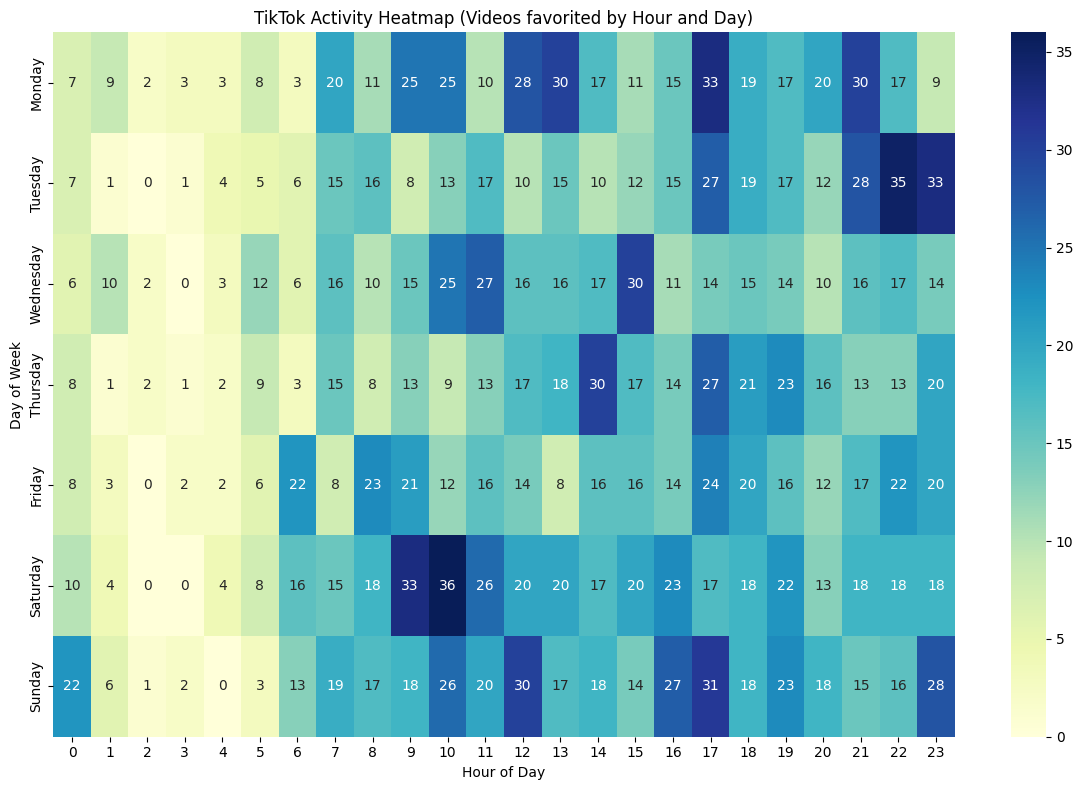

In [6]:
file_path = "user_data_tiktok.json"
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

favorite_videos = data.get("Activity", {}).get("Favorite Videos", {}).get("FavoriteVideoList", [])
videos_df = pd.DataFrame(favorite_videos)

if 'Date' in videos_df.columns:
    videos_df['Date'] = pd.to_datetime(videos_df['Date'], errors='coerce')

videos_df['DayOfWeek'] = videos_df['Date'].dt.day_name()
videos_df['Hour'] = videos_df['Date'].dt.hour

heatmap_data = videos_df.pivot_table(index='DayOfWeek', columns='Hour', aggfunc='size', fill_value=0)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("TikTok Activity Heatmap (Videos favorited by Hour and Day)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

# **Daily Tiktok Activity During June 2024 - December2024**

I created a csv file for login history. 

This histogram shows the hourly total number of logins.


File saved as sorted_login_history.csv


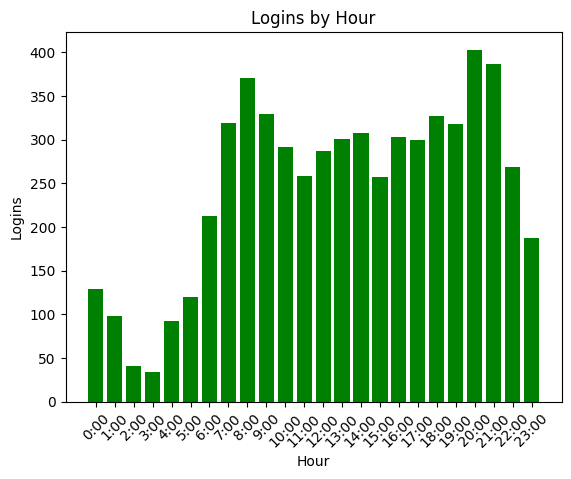

In [7]:
file_path = "user_data_tiktok.json"

with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

login_history = data["Activity"]["Login History"]["LoginHistoryList"]
df = pd.DataFrame(login_history)

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['Hour'] = df['Date'].dt.hour
hour_counts = df['Hour'].value_counts().sort_index()

df.to_csv("sorted_login_history.csv", index=False)
print("File saved as sorted_login_history.csv")

plt.bar(hour_counts.index, hour_counts.values, color='green')
plt.xticks(range(24), [f"{hour}:00" for hour in range(24)], rotation=45)
plt.xlabel("Hour")
plt.ylabel("Logins")
plt.title("Logins by Hour")
plt.show()


This histogram below shows the total number of logins for each specific day.

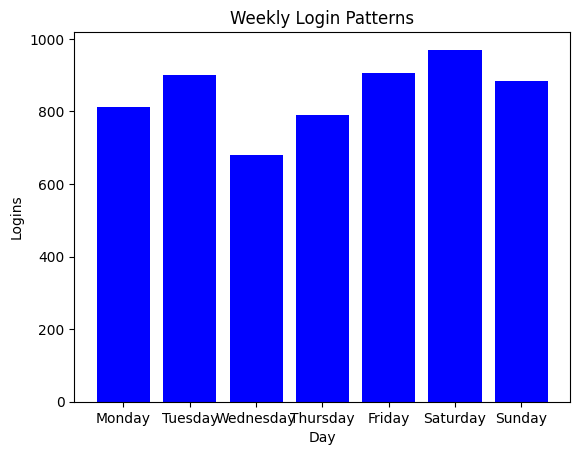

In [9]:

file_path = "sorted_login_history.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.day_name()

weekly_counts = data['DayOfWeek'].value_counts()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_counts = weekly_counts.reindex(days_order)

plt.bar(weekly_counts.index, weekly_counts.values, color='blue')
plt.xlabel("Day")
plt.ylabel("Logins")
plt.title("Weekly Login Patterns")
plt.show()


This histogram below shows the average number of logins for each specific day.

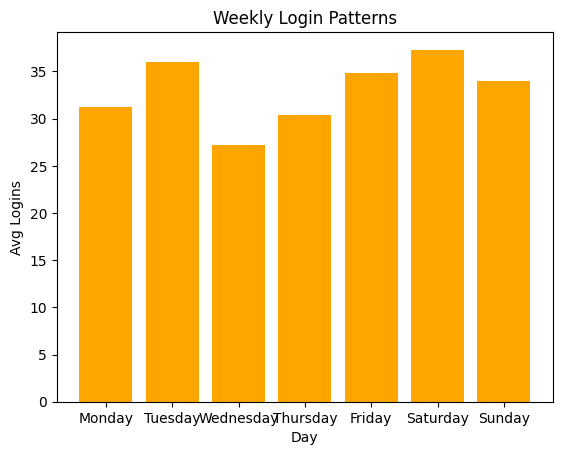

In [10]:

data = pd.read_csv("sorted_login_history.csv")
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['DayOfWeek'] = data['Date'].dt.day_name()
data['WeekNumber'] = data['Date'].dt.isocalendar().week

logins_per_day = data.groupby(['WeekNumber', 'DayOfWeek']).size().reset_index(name='LoginCount')
average_logins = logins_per_day.groupby('DayOfWeek')['LoginCount'].mean()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_logins = average_logins.reindex(days_order)

plt.bar(average_logins.index, average_logins.values, color='orange')
plt.xlabel("Day")
plt.ylabel("Avg Logins")
plt.title("Weekly Login Patterns")
plt.show()


The part below calculates weekend and weekday login number averages to calculate whether there is a correlation or not.

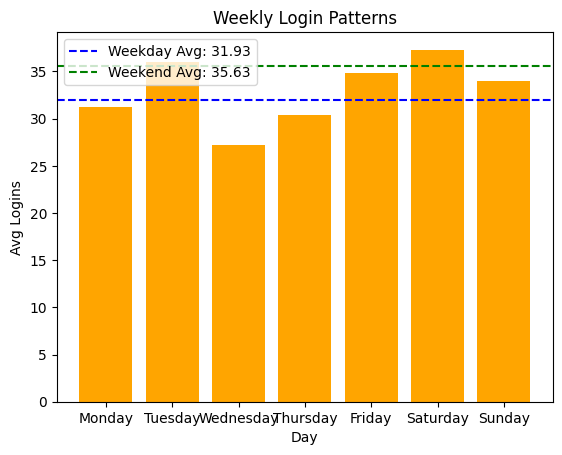

T-statistic: -1.20, P-value: 0.23396


In [13]:

weekday_data = logins_per_day[logins_per_day['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['LoginCount']
weekend_data = logins_per_day[logins_per_day['DayOfWeek'].isin(['Saturday', 'Sunday'])]['LoginCount']

t_stat, p_value = ttest_ind(weekday_data, weekend_data, equal_var=False)

plt.bar(average_logins.index, average_logins.values, color='orange')
plt.axhline(y=weekday_data.mean(), color='blue', linestyle='--', label=f"Weekday Avg: {weekday_data.mean():.2f}")
plt.axhline(y=weekend_data.mean(), color='green', linestyle='--', label=f"Weekend Avg: {weekend_data.mean():.2f}")
plt.xlabel("Day")
plt.ylabel("Avg Logins")
plt.title("Weekly Login Patterns")
plt.legend()
plt.show()

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")


This part creates a csv file that shows the number of videos I watched every day during the 6 month period.

In [14]:

with open('user_data_tiktok.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

video_list = data["Activity"]["Video Browsing History"]["VideoList"]
video_counts = Counter()

for entry in video_list:
    date = entry["Date"].split(" ")[0]
    video_counts[date] += 1

sorted_counts = sorted(video_counts.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_counts, columns=["Date", "Total Videos"])

df.to_csv("Video_Browsing_History.csv", index=False)
print("File saved: Video_Browsing_History.csv")


File saved: Video_Browsing_History.csv


# **GoodNotes Data and TikTok Activity Analysis**
This plot shows the correlation between my video browsing history and good notes usage.

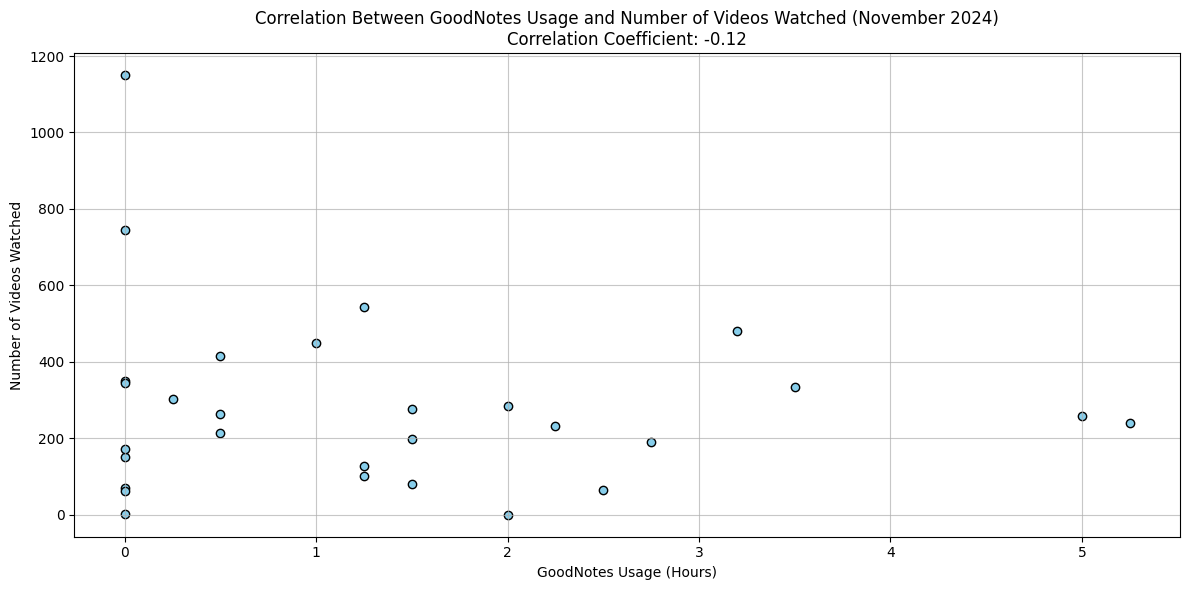

Correlation Coefficient: -0.12399551449365726


In [15]:

goodnotes_data_path = "good noted daily usage november.xlsx"
video_browsing_history_path = "Video_Browsing_History.csv"


goodnotes_data = pd.read_excel(goodnotes_data_path)
video_browsing_data = pd.read_csv(video_browsing_history_path)


goodnotes_data["Date"] = pd.to_datetime(goodnotes_data["Date"])
video_browsing_data["Date"] = pd.to_datetime(video_browsing_data["Date"])

november_videos = video_browsing_data[
    (video_browsing_data["Date"] >= "2024-11-01") & (video_browsing_data["Date"] <= "2024-11-30")
]


combined_data_videos = pd.DataFrame({
    "Date": goodnotes_data["Date"],
    "GoodNotes_Usage": goodnotes_data["hour"],
    "Videos_Watched": november_videos.set_index("Date")
        .reindex(goodnotes_data["Date"])["Total Videos"]
        .fillna(0)
        .astype(int)
        .values
})


combined_data_videos["GoodNotes_Usage"] = pd.to_numeric(combined_data_videos["GoodNotes_Usage"], errors="coerce")

correlation_videos = combined_data_videos["GoodNotes_Usage"].corr(combined_data_videos["Videos_Watched"])

plt.figure(figsize=(12, 6))
plt.scatter(
    combined_data_videos["GoodNotes_Usage"],
    combined_data_videos["Videos_Watched"],
    color="skyblue",
    edgecolor="black"
)
plt.xlabel("GoodNotes Usage (Hours)")
plt.ylabel("Number of Videos Watched")
plt.title(
    f"Correlation Between GoodNotes Usage and Number of Videos Watched (November 2024)\n"
    f"Correlation Coefficient: {correlation_videos:.2f}"
)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


print("Correlation Coefficient:", correlation_videos)


I did the same analysis for login history below.

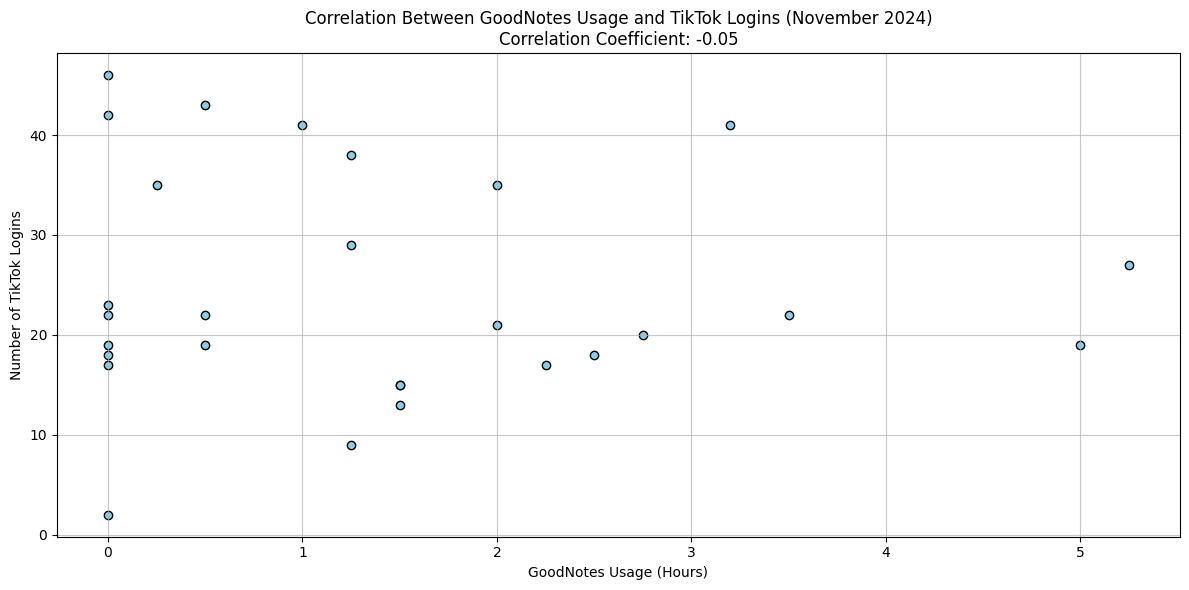

Correlation Coefficient: -0.05023444638144591


In [16]:

goodnotes_data_path = "good noted daily usage november.xlsx"
login_data_path = "sorted_login_history.csv"

goodnotes_data = pd.read_excel(goodnotes_data_path)
login_data = pd.read_csv(login_data_path)


goodnotes_data["Date"] = pd.to_datetime(goodnotes_data["Date"])
login_data["Date"] = pd.to_datetime(login_data["Date"])


november_logins = login_data[
    (login_data["Date"] >= "2024-11-01") & (login_data["Date"] <= "2024-11-30")
]


daily_logins = november_logins.groupby(november_logins["Date"].dt.date).size().reset_index(name="TikTok_Logins")
daily_logins["Date"] = pd.to_datetime(daily_logins["Date"])

combined_data_logins = pd.merge(
    goodnotes_data,
    daily_logins,
    on="Date",
    how="inner"
)


combined_data_logins["hour"] = pd.to_numeric(combined_data_logins["hour"], errors="coerce")


correlation_logins = combined_data_logins["hour"].corr(combined_data_logins["TikTok_Logins"])


plt.figure(figsize=(12, 6))
plt.scatter(
    combined_data_logins["hour"],
    combined_data_logins["TikTok_Logins"],
    color="skyblue",
    edgecolor="black"
)
plt.xlabel("GoodNotes Usage (Hours)")
plt.ylabel("Number of TikTok Logins")
plt.title(
    f"Correlation Between GoodNotes Usage and TikTok Logins (November 2024)\n"
    f"Correlation Coefficient: {correlation_logins:.2f}"
)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


print("Correlation Coefficient:", correlation_logins)


# **Some Additional Analyses**

Average TikTok Usage per Day: 2.75 hours


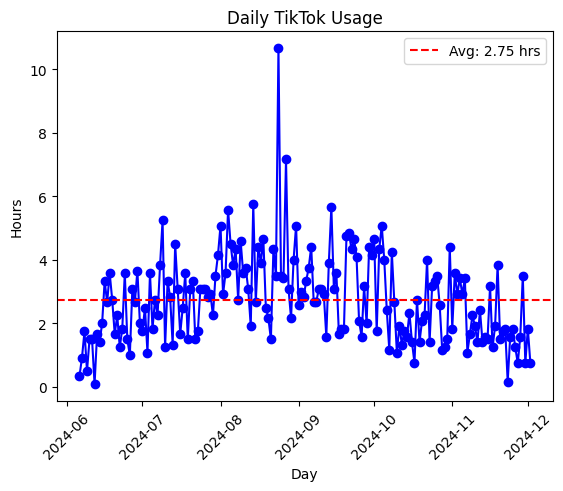

In [ ]:
data = pd.read_csv("sorted_login_history.csv")
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Day'] = data['Date'].dt.date

data['SessionMinutes'] = 5
time_per_day = data.groupby('Day')['SessionMinutes'].sum().reset_index()
time_per_day['SessionHours'] = time_per_day['SessionMinutes'] / 60
average_hours = time_per_day['SessionHours'].mean()

print("Average TikTok Usage per Day:", round(average_hours, 2), "hours")

plt.plot(time_per_day['Day'], time_per_day['SessionHours'], marker='o', color='blue')
plt.axhline(average_hours, color='red', linestyle='--', label=f'Avg: {round(average_hours, 2)} hrs')
plt.xlabel("Day")
plt.ylabel("Hours")
plt.title("Daily TikTok Usage")
plt.legend()
plt.xticks(rotation=45)
plt.show()
